In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_data(num, xx, xy, yx, yy, c1, c2):
    X = []
    for i in range(num):
        temp = []
        x_ = np.random.uniform(xx,xy)
        y_ = np.random.uniform(yx,yy)
        # y_ = np.random.random()
        temp.append(x_)
        temp.append(y_)
        y_i = np.random.randint(c1,c2)
        temp.append(y_i)
        X.append(temp)
    return np.array(X)

In [71]:
X1 = create_data(20, -1, 2, 1, 3, 0, 1)
X2 = create_data(20, 4, 6, -4, -1, 1, 2)
X3 = create_data(20, -5, -3, -2.5, -0.5, 2, 3)

In [72]:
X = np.concatenate((X1, X2, X3))
np.random.shuffle(X)

In [73]:
y = X[:, 2]
y = np.array([int(i) for i in y])

In [75]:
X = np.delete(X, slice(2, 3), 1)

In [65]:
def visualize_data (X, y):
    # colormap = np.array(['r', 'c'])
    colormap = np.array(['m', 'c', 'y'])
    # plt.ylim(bottom=-0.1, top=1.1)
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y])
    plt.show()

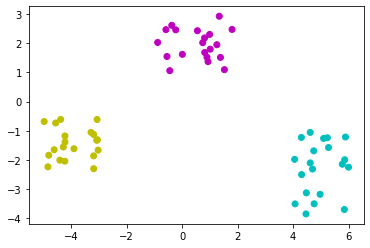

In [74]:
visualize_data(X, y)

In [10]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):

        self.lr = learning_rate
        self.n_iters = n_iters
        # self.activation_func = self.unit_step_func

        self.weights = None
        self.bias = None
        self.costs = []

In [78]:
class SoftmaxRegression(Perceptron):

    def __init__(self, learning_rate, n_iters, num_classes):
        super().__init__(learning_rate, n_iters)
        self.w_cache = None
        self.b_cache = None
        self.num_classes = num_classes

    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.weights = dw = np.zeros((self.num_classes, n_features))
        self.bias = db = np.zeros((self.num_classes, 1))
        total_loss = 0.0
        self.w_cache = []
        self.b_cache = []

        Y = np.eye(self.num_classes)[y]

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                x_i = X[idx, :].reshape((n_features, 1))
                y_i = Y[idx, :].reshape((self.num_classes, 1))

                linear_product = self.get_linear_product(x_i)
                y_predicted = self.softmax_stable(linear_product)
                dw_i, db_i = self.compute_gradient(x_i, y_i, y_predicted)
                loss = self.compute_loss_stable(y_i, linear_product)

                dw += dw_i
                db += db_i
                total_loss += loss

            dw = (1.0/n_samples) * dw
            db = (1.0/n_samples) * db
            total_loss = (1.0/n_samples) * total_loss

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            self.costs.append(total_loss)
            self.w_cache.append(self.weights)
            self.b_cache.append(self.bias)

            if (epoch+1)%100==0:
                print(f'epoch: {epoch+1}')
                print(f'weights = {self.weights}')
                print(f'bias = {self.bias}')
                print(f'cost = {total_loss}')
                print("")

    def predict(self, X):
        result = []
        n_samples, n_features = X.shape
        for idx, x_i in enumerate(X):
            x_i = X[idx, :].reshape((n_features, 1))
            linear_product = self.get_linear_product(x_i)
            y_predicted = self.softmax_stable(linear_product)
            max_val = y_predicted.max()
            temp = y_predicted.tolist()
            max_idx = temp.index(max_val)
            result.append(max_idx)
        return np.array(result)

    def get_linear_product(self, X):
        return np.matmul(self.weights, X) + self.bias

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z))

    def softmax_stable(self, z):
        return np.exp(z - z.max()) / np.sum(np.exp(z - z.max()))

    def compute_loss(self, y, a):
        return -1.0 * np.sum(y * np.log(a))

    def compute_loss_stable(self, y, z):
        return -1.0 * np.sum(y * (z - z.max() - np.log(np.sum(np.exp(z - z.max())))))

    def compute_gradient(self, X, y, a):
        # dL / da
        # dl_da = -y / a
        dl_da = self.cal_dl_da(y, a)

        # da / dz
        # compute am
        extension = np.ones((1, self.num_classes))  # (1, 3)
        am = np.matmul(a, extension)           # (3, 1) x (1, 3)
        one = np.identity(self.num_classes)         # (3, 3)
        da_dz = am * (one - am.T)              # (3, 3)

        # dl / dz
        dl_dz = np.matmul(da_dz, dl_da)        # (3, 1)

        # dl / dw
        dl_dw = np.matmul(dl_dz, X.T)          # (3, 2)

        # dl / db
        dl_db = dl_dz.copy()                   # (3, 1)

        return dl_dw, dl_db

    def cal_dl_da (self, y, a):
        w = np.zeros(a.shape)
        for i in range(a.shape[0]):
            if y[i][0] == 0:
                w[i][0] = 0
            elif a[i][0] > 1.7976e-10:
                w[i][0] = -y[i][0]
            else:
                w[i][0] = -y[i][0] / a[i][0]
        return w

In [80]:
model = SoftmaxRegression(learning_rate=0.1, n_iters=1000, num_classes=3)
model.fit(X, y)

epoch: 100
weights = [[ 0.14126929 -1.17226831]
 [-1.08167591  0.47409706]
 [ 0.94040661  0.69817125]]
bias = [[-0.41847638]
 [-0.02625052]
 [ 0.4447269 ]]
cost = 8.10262281276889

epoch: 200
weights = [[ 0.15291672 -1.12564367]
 [-1.06999018  0.46503088]
 [ 0.91707346  0.66061279]]
bias = [[-0.38926125]
 [-0.03685   ]
 [ 0.42611125]]
cost = 7.925248441574045

epoch: 300
weights = [[ 0.16813678 -1.06836846]
 [-1.05636359  0.45390093]
 [ 0.88822681  0.61446753]]
bias = [[-0.35372431]
 [-0.04954801]
 [ 0.40327232]]
cost = 7.71038940943409

epoch: 400
weights = [[ 0.18937141 -0.99391748]
 [-1.03988636  0.43938951]
 [ 0.85051496  0.55452797]]
bias = [[-0.30810095]
 [-0.06555147]
 [ 0.37365242]]
cost = 7.436695497177868

epoch: 500
weights = [[ 0.22254997 -0.88700626]
 [-1.01875016  0.41828866]
 [ 0.79620019  0.4687176 ]]
bias = [[-0.24369731]
 [-0.08763454]
 [ 0.33133185]]
cost = 7.056477892427686

epoch: 600
weights = [[ 0.28902045 -0.69478318]
 [-0.98844746  0.37859015]
 [ 0.69942701  0.

In [13]:
def visualize_cost (model):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(np.array(model.costs))
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Gradient Descent')
    plt.show()

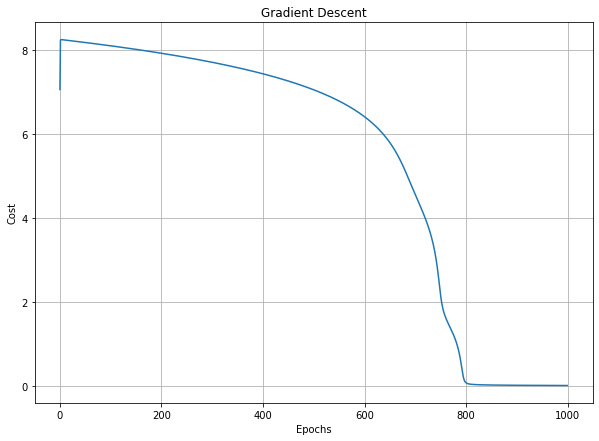

In [81]:
visualize_cost(model)

In [52]:
def plot_decision_boundary(X, Y, W, b):
  plt.figure(figsize=(10, 7))
  plt.grid()
  plt.xlim([-5.5, 6.5])
  plt.ylim([-4.0, 3.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  colormap = np.array(['m', 'c', 'y'])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

  xs = np.array([-5.5, 6.5])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

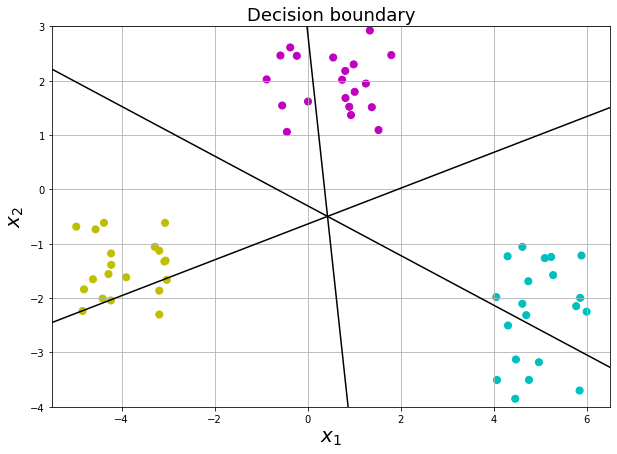

In [82]:
plot_decision_boundary(X, y, model.weights, model.bias)

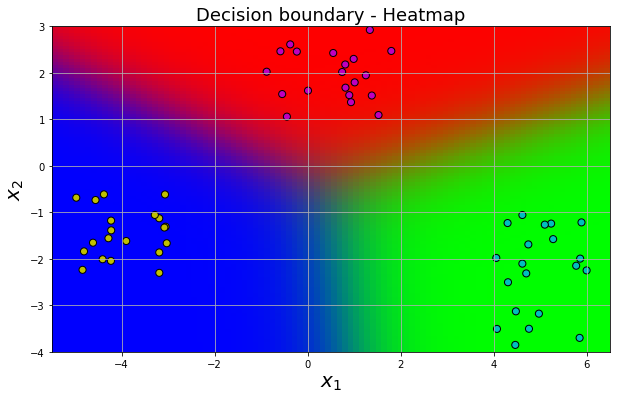

In [83]:
NX = 100
NY = 100

def plot_decision_boundary_heatmap(X, Y, W, b):
  plt.figure(figsize=(10,7))
  plt.grid()
  plt.xlim([-5.5, 6.5])
  plt.ylim([-4.0, 3.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Heatmap', size = 18)

  xs = np.linspace(-5.5, 6.5, NX)
  ys = np.linspace(3.0, -4.0, NY)
  xv, yv = np.meshgrid(xs, ys)
  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  A = []
  for j in range(X_fake.shape[0]):
    x_j = X_fake[j,:].reshape(2,1)
    # z_j, a_j = forward(W, b, x_j)
    a_j = model.softmax_stable(model.get_linear_product(x_j))
    A.append(a_j)
  colormap = np.array(['m', 'c', 'y'])
  plt.imshow(np.array(A).reshape(NX, NY, 3), extent=[-5.5, 6.5, -4.0, 3.0])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y], edgecolors='black')

plot_decision_boundary_heatmap(X, y, model.w_cache[-1], model.b_cache[-1])

In [84]:
X1_test = create_data(15, -1, 2, 1, 3, 0, 1)
X2_test = create_data(15, 4, 6, -4, -1, 1, 2)
X3_test = create_data(15, -5, -3, -2.5, -0.5, 2, 3)

In [85]:
X_test = np.concatenate((X1_test, X2_test, X3_test))
np.random.shuffle(X_test)

In [86]:
y_test = X_test[:, 2]
y_test = np.array([int(i) for i in y_test])
y_test

array([2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1,
       0])

In [88]:
X_test = np.delete(X_test, slice(2, 3), 1)

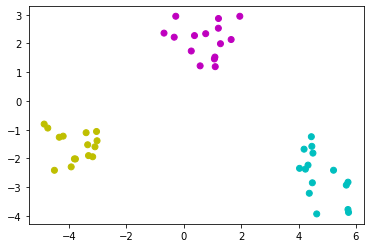

In [87]:
visualize_data(X_test, y_test)

In [89]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [90]:
y_pred = model.predict(X_test)
print(f'Test accuracy: {accuracy(y_test, y_pred)* 100}%')

Test accuracy: 100.0%


In [92]:
def create_colormap(y):
  ans = []
  for item in y:
    if item == 0:
      ans.append('yellow')
    elif item == 1:
      ans.append('purple')
    else:
      ans.append('orange')
  return np.array(ans)

In [93]:
my_colormap = create_colormap(y_test)

In [94]:
def plot_decision_boundary2(X, Y, W, b):
  plt.figure(figsize=(10, 7))
  plt.grid()
  plt.xlim([-5.5, 6.5])
  plt.ylim([-4.0, 3.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  plt.scatter(X[:, 0], X[:, 1], s=50, c=my_colormap)

  xs = np.array([-5.5, 6.5])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

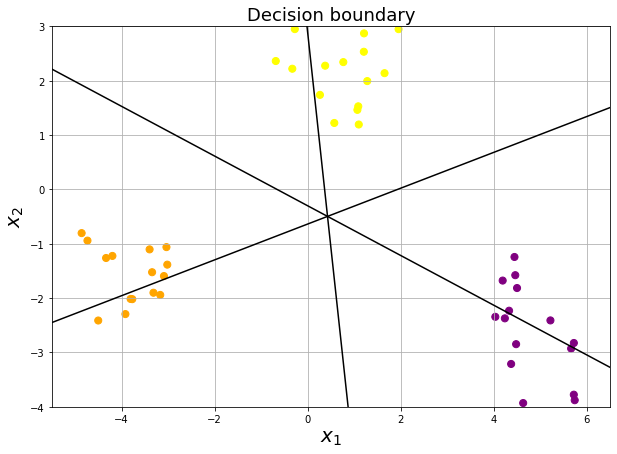

In [95]:
plot_decision_boundary2(X_test, y_test, model.weights, model.bias)

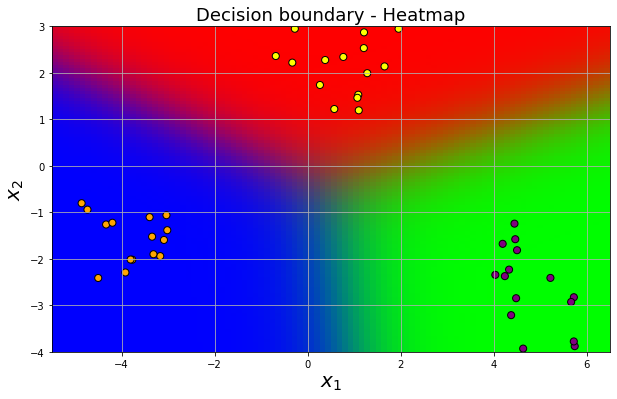

In [96]:
NX = 100
NY = 100

def plot_decision_boundary_heatmap2(X, Y, W, b):
  plt.figure(figsize=(10,7))
  plt.grid()
  plt.xlim([-5.5, 6.5])
  plt.ylim([-4.0, 3.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Heatmap', size = 18)

  xs = np.linspace(-5.5, 6.5, NX)
  ys = np.linspace(3.0, -4.0, NY)
  xv, yv = np.meshgrid(xs, ys)
  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  A = []
  for j in range(X_fake.shape[0]):
    x_j = X_fake[j,:].reshape(2,1)
    # z_j, a_j = forward(W, b, x_j)
    a_j = model.softmax_stable(model.get_linear_product(x_j))
    A.append(a_j)
  
  plt.imshow(np.array(A).reshape(NX, NY, 3), extent=[-5.5, 6.5, -4.0, 3.0])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=my_colormap, edgecolors='black')

plot_decision_boundary_heatmap2(X_test, y_test, model.w_cache[-1], model.b_cache[-1])